In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# imports cell
import sys 
import matplotlib.pyplot as plt
import scipy as sp
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import _pickle as cPickle
import random, sys, keras
import gc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
import scipy.integrate as it
from sklearn import preprocessing

# import tensorflow as tf
# import gc

In [ ]:
# filepath = "/content/drive/My Drive/7th Term Assignments, Sheets & Labs/Modulation_classification/data/" # Yomna
# filepath = "/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/data" # Arsany
filepath = "/content/drive/MyDrive/Modulation_classification/data" # Kiro
os.chdir(filepath)

May help: https://github.com/LionAE/modulation-recognition-for-wireless-signals

2-
https://erichizdepski.wordpress.com/2019/05/23/using-machine-learning-to-categorize-radio-signals/


## **Download Data**

In [ ]:
# # you do not need to run this cell if you have an access to google drive.
# # download the dataset.
# !wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
# !tar -xf RML2016.10b.tar.bz2.1

--2020-12-31 01:59:38--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2.1’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  13.3MB/s    in 89s     

2020-12-31 02:01:08 (13.3 MB/s) - ‘RML2016.10b.tar.bz2.1’ saved [1245608913/1245608913]



# **Loading data**

In [ ]:
with open('RML2016.10b.dat', 'rb') as f:
    Xd = cPickle.load(f, encoding="latin1") 
 
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    # mod is the label. mod = modulation scheme
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        #snr = signal to noise ratio
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

# **Create feature Spaces**

### 1. Raw time series as given (two channels)

In [ ]:
# if want n * 2 * 128
# X_raw = X[:,0], X[:,1]
# X_raw = np.asarray(X_raw)
# print(X_raw.shape)

In [ ]:
# if want n * 256
# X_raw = np.reshape(X_raw, (1200000,256))
# print(X_raw.shape)

In [ ]:
# delete X_raw and collect garbage
# del(X_raw)
# gc.collect()

### 2. First derivative in time (two channels)

In [ ]:
# if want n * 2 * 128
# X_der = np.apply_along_axis(lambda column:np.gradient(column),2,X)
# X_der = np.asarray(X_der)
# print(X_der.shape)

In [ ]:
# # if want n * 256
# X_der = np.reshape(X_der, (1200000,256))
# print(X_der.shape)

In [ ]:
# # delete X_der and collect garbage
# del(X_der)
# gc.collect()

### 3. Integral in time (two channels)

In [ ]:
# if want n * 2 * 128
# X_int = np.apply_along_axis(lambda column:np.hstack((0,column)),2,np.apply_along_axis(lambda column:sp.integrate.cumtrapz(column,dx=1,axis=-1),2,X))
# X_int = np.asarray(X_int)
# print(X_int.shape)

In [ ]:
# # if want n * 256
# X_int = np.reshape(X_int, (1200000,256))
# print(X_int.shape)

In [ ]:
# # delete X_int and collect garbage
# del(X_int)
# gc.collect()

### 4. combinations of 1,2 and 3. (More channels)

In [ ]:
# if want n * 4 * 128
# com_three_X = np.concatenate((np.apply_along_axis(lambda column:np.gradient(column),2,X) ,np.apply_along_axis(lambda column:np.hstack((0,column)),2,np.apply_along_axis(lambda column:sp.integrate.cumtrapz(column,dx=1,axis=-1),2,X))),axis=1)
# print(com_three_X.shape)
# com_three_X = np.asarray(com_three_X)
# print(com_three_X.shape)

In [ ]:
# # if want n * 512
# com_three_X = np.reshape(com_three_X, (1200000,512))

In [ ]:
# # delete com_three_X and collect garbage
# del(com_three_X)
# gc.collect()

# **Supervised Learning Step**

flatten the X train and test

In [ ]:
nsamples, nx, ny = trainX.shape
X_train = trainX.reshape((nsamples,nx*ny))

nsamples, nx, ny = testX.shape
X_test = testX.reshape((nsamples,nx*ny))

nsamples, nx, ny = valX.shape
X_val = valX.reshape((nsamples,nx*ny))

print(X_train.shape)

print(X_test.shape)

print(X_val.shape)

NameError: ignored

In [ ]:
# Partition the data
#  into training and test sets of the form we can train/test on
#  while keeping SNR and Mod labels handy for each
n_examples = X.shape[0]
# looks like taking half the samples for training
n_train = int(n_examples * 0.7)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
# X_train = X[train_idx]
# X_test =  X[test_idx]

def to_onehot(yy):
    data = list(yy)
    yy1 = np.zeros([len(data), max(data)+1])
    yy1[np.arange(len(data)),data] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

(X_train, X_val, Y_train, Y_val) = train_test_split(X_train, Y_train, test_size=0.05)
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)
print(X_test.shape,Y_test.shape)

### Classifiers

In [ ]:
# passed parameters
# X_train - X_test - X_val

# trainY_mods - trainY_snr

# testY_mods - testY_snr

# valY_mods - valY_snr

Logistic Regression Classifier

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

logistic_regression = LogisticRegression(max_iter=1000)
scaler = MinMaxScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.transform(X_test)
normalized_X_val = scaler.transform(X_val)
logistic_regression_model = logistic_regression.fit(normalized_X_train, trainY_mods)

In [ ]:
import pickle
pickle.dump(logistic_regression_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/logistic_regression.sav', 'wb'))

# loaded_model = pickle.load(open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/logistic_regression.sav', 'rb'))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
acc = []
tr_acc = []
val_acc = []
for snr in snrs:
  print("SNR = ", snr)
  #test accuracy
  normalized_X_test_i = normalized_X_test[np.where(testY_snr == str(snr))]
  testY_mods_i = testY_mods[np.where(testY_snr == str(snr))]

  y_pred = logistic_regression_model.predict(normalized_X_test_i)
  accuracy = accuracy_score(y_pred, testY_mods_i)
  acc.append(accuracy)
  print("\nAccuracy = ", accuracy)

  #train accuracy
  normalized_X_train_i = normalized_X_train[np.where(trainY_snr == str(snr))]
  trainY_mods_i = trainY_mods[np.where(trainY_snr == str(snr))]

  y_pred_train = logistic_regression_model.predict(normalized_X_train_i)
  train_accuracy = accuracy_score(y_pred_train, trainY_mods_i)
  tr_acc.append(train_accuracy)
  print("Train Accuracy = ", train_accuracy)

  #validation accuracy
  X_val_i = X_val[np.where(valY_snr == str(snr))]
  valY_mods_i = valY_mods[np.where(valY_snr == str(snr))]

  y_pred_val = logistic_regression_model.predict(X_val_i)
  val_accuracy = accuracy_score(y_pred_val, valY_mods_i)
  val_acc.append(val_accuracy)
  print("Validation Accuracy = ", val_accuracy)

  conf = confusion_matrix(testY_mods_i, y_pred)
  plt.figure()
  plot_confusion_matrix(conf, labels=mods, title="Logistic Regression Confusion Matrix (SNR=%d)"%(snr))

In [ ]:
# Plot the data
plt.plot(snrs, acc)
plt.xlabel('SNR in dB')
plt.ylabel('Accuracy%')
# Show the plot
plt.show()

Decision ​ Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

decision_tree = DecisionTreeClassifier()
# scaler = MinMaxScaler()
# normalized_X_train = scaler.fit_transform(X_train)
# normalized_X_test = scaler.transform(X_test)
# normalized_X_val = scaler.transform(X_val)
decision_tree_model = decision_tree.fit(X_train, trainY_mods)

In [ ]:
import pickle
pickle.dump(decision_tree_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/decision_tree.sav', 'wb'))

# loaded_model = pickle.load(open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/decision_tree.sav', 'rb'))

In [ ]:
acc = []
tr_acc = []
val_acc = []
for snr in snrs:
  print("SNR = ", snr)
  #test accuracy
  X_test_i = X_test[np.where(testY_snr == str(snr))]
  testY_mods_i = testY_mods[np.where(testY_snr == str(snr))]

  y_pred = decision_tree_model.predict(X_test_i)
  accuracy = accuracy_score(y_pred, testY_mods_i)
  acc.append(accuracy)
  print("\nAccuracy = ", accuracy)

  #train accuracy
  X_train_i = X_train[np.where(trainY_snr == str(snr))]
  trainY_mods_i = trainY_mods[np.where(trainY_snr == str(snr))]

  y_pred_train = decision_tree_model.predict(X_train_i)
  train_accuracy = accuracy_score(y_pred_train, trainY_mods_i)
  tr_acc.append(train_accuracy)
  print("Train Accuracy = ", train_accuracy)

  #validation accuracy
  X_val_i = X_val[np.where(valY_snr == str(snr))]
  valY_mods_i = valY_mods[np.where(valY_snr == str(snr))]

  y_pred_val = decision_tree_model.predict(X_val_i)
  val_accuracy = accuracy_score(y_pred_val, valY_mods_i)
  val_acc.append(val_accuracy)
  print("Validation Accuracy = ", val_accuracy)

  conf = confusion_matrix(testY_mods_i, y_pred)
  plt.figure()
  plot_confusion_matrix(conf, labels=mods, title="Decision Tree Confusion Matrix (SNR=%d)"%(snr))

In [ ]:
# Plot the data
plt.plot(snrs, acc)
plt.xlabel('SNR in dB')
plt.ylabel('Accuracy%')
# Show the plot
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 50, n_jobs=1)
random_forest_model = random_forest.fit(X_train, trainY_mods)

In [ ]:
import pickle
pickle.dump(random_forest_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/random_forest.sav', 'wb'))

# random_forest_model = pickle.load(open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/random_forest.sav', 'rb'))

In [ ]:
acc = []
tr_acc = []
val_acc = []
for snr in snrs:
  print("SNR = ", snr)
  #test accuracy
  X_test_i = X_test[np.where(testY_snr == str(snr))]
  testY_mods_i = testY_mods[np.where(testY_snr == str(snr))]

  y_pred = random_forest_model.predict(X_test_i)
  accuracy = accuracy_score(y_pred, testY_mods_i)
  acc.append(accuracy)
  print("\nAccuracy = ", accuracy)

  #train accuracy
  X_train_i = X_train[np.where(trainY_snr == str(snr))]
  trainY_mods_i = trainY_mods[np.where(trainY_snr == str(snr))]

  y_pred_train = random_forest_model.predict(X_train_i)
  train_accuracy = accuracy_score(y_pred_train, trainY_mods_i)
  tr_acc.append(train_accuracy)
  print("Train Accuracy = ", train_accuracy)

  #validation accuracy
  X_val_i = X_val[np.where(valY_snr == str(snr))]
  valY_mods_i = valY_mods[np.where(valY_snr == str(snr))]

  y_pred_val = random_forest_model.predict(X_val_i)
  val_accuracy = accuracy_score(y_pred_val, valY_mods_i)
  val_acc.append(val_accuracy)
  print("Validation Accuracy = ", val_accuracy)

  conf = confusion_matrix(testY_mods_i, y_pred)
  plt.figure()
  plot_confusion_matrix(conf, labels=mods, title="Random Forest Confusion Matrix (SNR=%d)"%(snr))

In [ ]:
# Plot the data
plt.plot(snrs, acc)
plt.xlabel('SNR in dB')
plt.ylabel('Accuracy%')
# Show the plot
plt.show()

In [ ]:
print("trainX.shape", trainX.shape)
print("testX.shape", testX.shape)
print("valX.shape", valX.shape)
print("trainy.shape", trainY.shape)
print("testy.shape", testY.shape)
print("valy.shape", valY.shape)

# Start

**Get features**

In [ ]:
def getFeatures(version): # 1, 2, 3, 4, 5, 6 or 7
  if (version == 1):
      # X_raw = X[:,0], X[:,1]
      # X_raw = np.asarray(X_raw)
      return X
  elif (version == 2):
      X_der = np.apply_along_axis(lambda column:np.gradient(column),2,X)
      X_der = np.asarray(X_der)  
      return X_der
  elif (version == 3):
      X_int = np.apply_along_axis(lambda column:np.hstack((0,column)),2,np.apply_along_axis(lambda column:sp.integrate.cumtrapz(column,dx=1,axis=-1),2,X))
      X_int = np.asarray(X_int)  
      return X_int
  elif (version == 4):
      com_two_X = np.concatenate((np.apply_along_axis(lambda column:np.gradient(column),2,X),X),axis=1)
      com_two_X = np.asarray(com_two_X)
      print(com_three_X.shape)
      return com_two_X
  elif (version == 5):
    com_two_X = np.concatenate((np.apply_along_axis(lambda column:np.hstack((0,column)),2,np.apply_along_axis(lambda column:sp.integrate.cumtrapz(column,dx=1,axis=-1),2,X)),X),axis=1)
    com_two_X = np.asarray(com_two_X)
    gc.collect()
    return com_two_X
  elif (version == 6):
    com_two_X = np.concatenate((np.apply_along_axis(lambda column:np.gradient(column),2,X),
                                np.apply_along_axis(lambda column:np.hstack((0,column)),2,np.apply_along_axis(lambda column:sp.integrate.cumtrapz(column,dx=1,axis=-1),2,X))),axis=1)
    com_two_X = np.asarray(com_two_X)
    return com_two_X
  elif (version == 7):
    com_three_X = np.concatenate((np.apply_along_axis(lambda column:np.gradient(column),2,X),
                                  np.apply_along_axis(lambda column:np.hstack((0,column)),2,np.apply_along_axis(lambda column:sp.integrate.cumtrapz(column,dx=1,axis=-1),2,X)),X),axis=1)
    com_three_X = np.asarray(com_three_X)
    return com_three_X
  else :
      print("Error:this version doesn't exist")
      return X


**Splitting Data**

In [ ]:
def split_data(XIn,YIn):
  Y = np.array(YIn)
  (trainX, testX, trainY, testY) = train_test_split(XIn,Y, test_size=0.3)
  (trainX, valX, trainY, valY) = train_test_split(trainX,trainY, test_size=0.05)

  lb = preprocessing.LabelBinarizer()
  trainY_mods, trainY_snr = zip(*trainY)
  testY_mods, testY_snr = zip(*testY)
  valY_mods, valY_snr = zip(*valY)

  trainY_mods = np.array(trainY_mods)
  trainY_mod10 = lb.fit_transform(trainY_mods)

  trainY_snr = np.array(trainY_snr)
  testY_mods = np.array(testY_mods)
  testY_mod10 = lb.fit_transform(testY_mods)
  testY_snr = np.array(testY_snr)
  valY_mods = np.array(valY_mods)
  valY_mod10 = lb.fit_transform(valY_mods)
  valY_snr = np.array(valY_snr)

  return trainX, trainY_snr, trainY_mods, trainY_mod10, valX, valY_snr, valY_mods, valY_mod10, testX, testY_snr, testY_mods, testY_mod10

**Flatten Data**

In [ ]:
def flatten(trainX, testX, valX):
  
  nsamples, nx, ny = trainX.shape
  X_train = trainX.reshape((nsamples,nx*ny))

  nsamples, nx, ny = testX.shape
  X_test = testX.reshape((nsamples,nx*ny))

  nsamples, nx, ny = valX.shape
  X_val = valX.reshape((nsamples,nx*ny))

  return X_train, X_test, X_val

In [ ]:
# change the number for the data you want 1, 2, 3, 4, 5, 6 or 7
trainX, trainY_snr, trainY_mods, trainY_mod10, valX, valY_snr, valY_mods, valY_mod10, testX, testY_snr, testY_mods, testY_mod10 = split_data(getFeatures(4),lbl)
del(X)
gc.collect()
X_train, X_test, X_val = flatten(trainX, testX, valX)

(1200000, 4, 128)


# Functions

**Confusion Matrix plotting**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

**SNRs Plotting**

In [ ]:
def snr_plot(acc, snrs):
  # Plot the data
  plt.plot(snrs, acc)
  plt.xlabel('SNR in dB')
  plt.ylabel('Accuracy%')
  # Show the plot
  plt.show()


**Calculating accuracy for each snr**

In [ ]:
def calculatingAcc(model,Xtr,Xte,Xva,shape):
  acc = []
  tr_acc = []
  val_acc = []
  for snr in snrs:
    print("\nSNR = ", snr)
    #test accuracy
    normalized_X_test_i = Xte[np.where(testY_snr == str(snr))]
    testY_mods_i = testY_mods[np.where(testY_snr == str(snr))]
    trainY_mods_i = trainY_mods[np.where(trainY_snr == str(snr))]
    valY_mods_i = valY_mods[np.where(valY_snr == str(snr))]
    y_pred = model.predict(normalized_X_test_i)
    if (shape == 10):
        testY_mods_i = testY_mod10[np.where(testY_snr == str(snr))]
        trainY_mods_i = trainY_mod10[np.where(trainY_snr == str(snr))]
        valY_mods_i = valY_mod10[np.where(valY_snr == str(snr))]
        testY_mods_i = np.argmax(testY_mods_i, axis=1)
        y_pred = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_pred, testY_mods_i)
    acc.append(accuracy)
    print("Accuracy = ", accuracy)

    #train accuracy
    normalized_X_train_i = Xtr[np.where(trainY_snr == str(snr))]
    y_pred_train = model.predict(normalized_X_train_i)

    if (shape == 10):
      trainY_mods_i = np.argmax(trainY_mods_i, axis=1)
      y_pred_train = np.argmax(y_pred_train, axis=1)

    train_accuracy = accuracy_score(y_pred_train, trainY_mods_i)
    tr_acc.append(train_accuracy)
    print("Train Accuracy = ", train_accuracy)

    #validation accuracy
    X_val_i = Xva[np.where(valY_snr == str(snr))]
    y_pred_val = model.predict(X_val_i)

    if (shape == 10):
      valY_mods_i = np.argmax(valY_mods_i, axis=1)
      y_pred_val = np.argmax(y_pred_val, axis=1)

    val_accuracy = accuracy_score(y_pred_val, valY_mods_i)
    val_acc.append(val_accuracy)
    print("Validation Accuracy = ", val_accuracy)
    print("Avarege Overall Accuracy = ", (val_accuracy+train_accuracy+accuracy)/3)
    conf = confusion_matrix(testY_mods_i, y_pred)
    plt.figure()
    plot_confusion_matrix(conf, labels=mods, title="Confusion Matrix (SNR=%d)"%(snr))
  return acc

# **Functions of Classifiers**

**Logistic Regression**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

def log_reg_classifier(snrs, mods, X_train, X_test, X_val, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr):  
  
  #logistic regression classifier
  logistic_regression = LogisticRegression(max_iter=1000)
  scaler = MinMaxScaler()
  normalized_X_train = scaler.fit_transform(X_train)
  normalized_X_test = scaler.transform(X_test)
  normalized_X_val = scaler.transform(X_val)
  logistic_regression_model = logistic_regression.fit(normalized_X_train, trainY_mods)

  #save model
  # pickle.dump(logistic_regression_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/logistic_regression(feature_typexxxx).sav', 'wb'))

  acc = calculatingAcc(logistic_regression_model,normalized_X_train,normalized_X_test,normalized_X_val,0)
  return acc

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

def decision_tree_classifier(snrs, mods, X_train, X_test, X_val, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr):

  #Decision Tree classifier
  decision_tree = DecisionTreeClassifier()
  decision_tree_model = decision_tree.fit(X_train, trainY_mods)

  #save model
  # pickle.dump(decision_tree_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/decision_tree(feature_typexxxx).sav', 'wb'))

  acc = calculatingAcc(decision_tree_model,X_train,X_test,X_val,0)
  return acc

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

def random_forest_classifier(snrs, mods, X_train, X_test, X_val, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr):

  #random forest classifier
  random_forest = RandomForestClassifier(n_estimators = 50, n_jobs=1)
  random_forest_model = random_forest.fit(X_train, trainY_mods)

  #save model
  # pickle.dump(decision_tree_model, open(f'/content/drive/MyDrive/College/Data_Mining_Assignments/Modulation_classification/models/random_forest(feature_typexxxx).sav', 'wb'))

  acc = calculatingAcc(random_forest_model,X_train,X_test,X_val,0)
  return acc

**Fully Connetced Dense Layer**

In [ ]:
def full_dense(X_train, trainY_mod10, X_val, valY_mod10, X_test):

  in_shp = list(X_train.shape[1:])
  model = models.Sequential()
  model.add(Dense(128, activation ='relu', input_shape = in_shp))
  model.add(Flatten())
  model.add(Dense(10, activation ='softmax'))

  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

  print("Model summary for this input: ")  
  model.summary()
  
  nb_epoch = 100     # number of epochs to train on
  batch_size = 1024  # training batch size
  
  print("Start training for model: ")
  history = model.fit(X_train,
      trainY_mod10,
      batch_size = batch_size,
      epochs = nb_epoch,
      verbose = 2,
      validation_data = (X_val, valY_mod10),
      callbacks = [
          keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
          keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
      ])
  print("Training End")

  plt.figure(1)
  plt.title('Training performance')
  plt.plot(history.epoch, history.history['loss'], label='train loss+error')
  plt.plot(history.epoch, history.history['val_loss'], label='val_error')
  plt.legend()

  plt.figure(2)
  acc = calculatingAcc(model, X_train, X_test, X_val, 10)
  snr_plot(acc, snrs)

**CNN Model**

**Function to create model**

In [ ]:

def CnnModel(X_trainIn,Y_trainIn,X_valIn,Y_valIn,X_testIn,Y_testIn):
  in_shp = list(X_trainIn.shape[1:])
  dr = 0.5
  # [(W−K+2P)/S]+1
  model = models.Sequential()
  # input 2 * 128
  model.add(Reshape([1]+in_shp, input_shape=in_shp))
  # model.add(ZeroPadding2D((0, 2)))
  # ConvLayer1 64 * 1 * 3
  model.add(Conv2D(64, (1, 3), activation="relu", name="conv1",  padding="valid",data_format = 'channels_first', kernel_initializer="glorot_uniform"))
  model.add(Dropout(dr))
  # model.add(ZeroPadding2D((0, 2)))
  # ConvLayer2 16 * 2 * 3
  model.add(Conv2D(16, (2, 3), activation="relu", name="conv2", padding="valid",data_format = 'channels_first',  kernel_initializer="glorot_uniform"))
  model.add(Dropout(dr))
  model.add(Flatten())
  # Dense Layer 128
  model.add(Dense(128, activation="relu", name="dense1", kernel_initializer="he_normal"))
  model.add(Dropout(dr))
  # Dense Layer 10
  model.add(Dense(10,activation='softmax', name="dense2", kernel_initializer="he_normal"))
  model.compile(loss='categorical_crossentropy', optimizer='adam')
  model.build(X_trainIn.shape) 
  print("Model summary for this input: ")                         
  model.summary()
  nb_epoch = 100     # number of epochs to train on
  batch_size = 1024  # training batch size
  filepath = 'models/cnnmodel.h5'
  print("Start training for model: ")
  history = model.fit(X_trainIn,
      Y_trainIn,
      batch_size=batch_size,
      epochs=nb_epoch,
      verbose=2,
      validation_data=(X_valIn, Y_valIn),
      callbacks = [
          keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
          keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
      ])
  model.load_weights(filepath)
  print("Training End")
  print("Scores :")
  score1 = model.evaluate(X_trainIn, Y_trainIn, verbose=0, batch_size=batch_size)
  score2 = model.evaluate(X_valIn, Y_valIn, verbose=0, batch_size=batch_size)
  score3 = model.evaluate(X_testIn, Y_testIn, verbose=0, batch_size=batch_size)
  print("Train = ",score1)
  print("Validation = ",score2)
  print("Test = ",score3)
  print("Trainig Performance :")
  plt.figure(1)
  plt.title('Training performance')
  plt.plot(history.epoch, history.history['loss'], label='train loss+error')
  plt.plot(history.epoch, history.history['val_loss'], label='val_error')
  plt.legend()
  plt.figure(2)
  acc = calculatingAcc(model,X_trainIn,X_testIn,X_valIn,10)
  snr_plot(acc, snrs)
  return

# **Training Classifiers**

In [ ]:
# delete X you work on and collect garbage
# del(X)
gc.collect()

0

In [ ]:
# # trainX, testX, valX, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr = split_data(com_three_X, lbl)
# trainX, trainY_snr, trainY_mods, trainY_mod10, valX, valY_snr, valY_mods, valY_mod10, testX, testY_snr, testY_mods, testY_mod10 = getSplitedData(getFeatures(2),lbl)
# X_train, X_test, X_val = flatten(trainX, testX, valX)



SNR =  -20
Accuracy =  0.09877160802623534
Train Accuracy =  0.1132629992464205
Validation Accuracy =  0.10504774897680765
Avarege Overall Accuracy =  0.10569411874982117


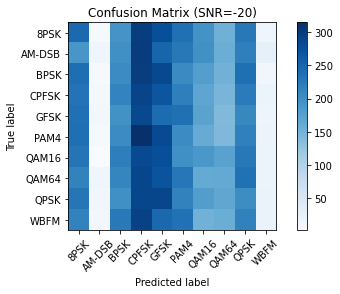


SNR =  -18
Accuracy =  0.09996136225644423
Train Accuracy =  0.11252291389398086
Validation Accuracy =  0.1
Avarege Overall Accuracy =  0.10416142538347502


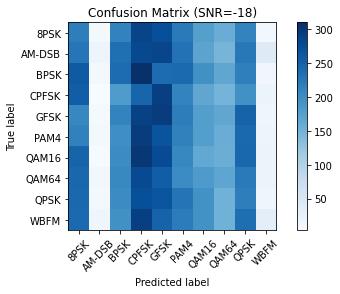


SNR =  -16
Accuracy =  0.10251104524355462
Train Accuracy =  0.11572811647862306
Validation Accuracy =  0.08900279589934762
Avarege Overall Accuracy =  0.10241398587384176


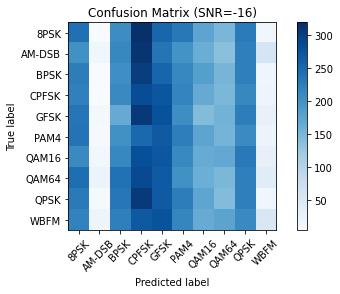


SNR =  -14
Accuracy =  0.10645143396017086
Train Accuracy =  0.11804025635890246
Validation Accuracy =  0.11631345490389354
Avarege Overall Accuracy =  0.11360171507432228


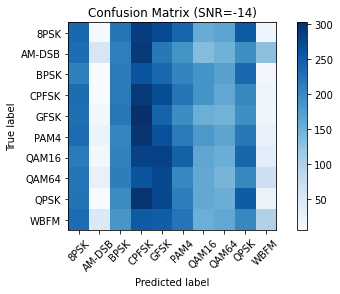


SNR =  -12
Accuracy =  0.11855354659248957
Train Accuracy =  0.12862509391435012
Validation Accuracy =  0.10596658711217184
Avarege Overall Accuracy =  0.11771507587300384


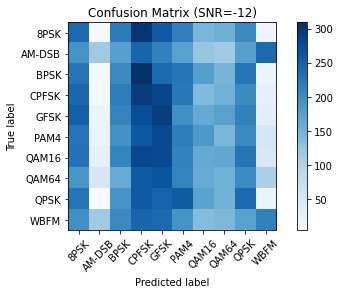


SNR =  -10
Accuracy =  0.14055870846878615
Train Accuracy =  0.15687606966676734
Validation Accuracy =  0.13874469089193014
Avarege Overall Accuracy =  0.14539315634249453


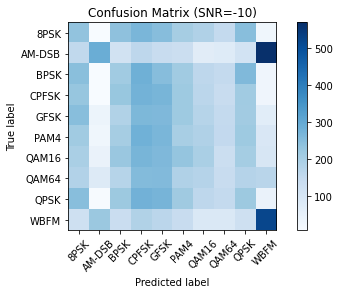


SNR =  -8
Accuracy =  0.1754542913055633
Train Accuracy =  0.18452470153354314
Validation Accuracy =  0.16466056812710642
Avarege Overall Accuracy =  0.1748798536554043


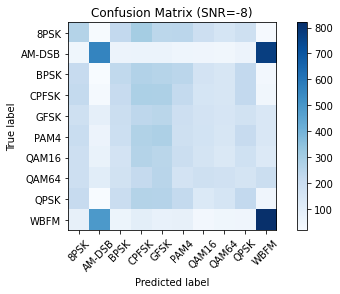


SNR =  -6
Accuracy =  0.18193876423123687
Train Accuracy =  0.19392341494036408
Validation Accuracy =  0.1802018260451706
Avarege Overall Accuracy =  0.18535466840559053


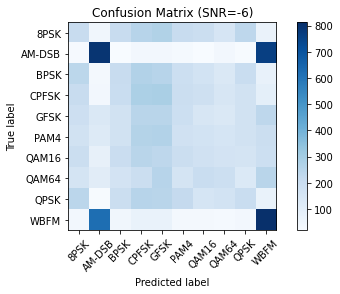


SNR =  -4
Accuracy =  0.18257423532038403
Train Accuracy =  0.19078914488480184
Validation Accuracy =  0.17424975798644723
Avarege Overall Accuracy =  0.1825377127305444


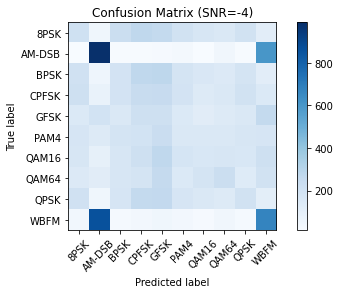


SNR =  -2
Accuracy =  0.18110846575494158
Train Accuracy =  0.19092528029295944
Validation Accuracy =  0.18115942028985507
Avarege Overall Accuracy =  0.18439772211258534


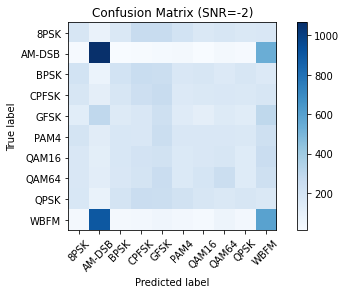


SNR =  0
Accuracy =  0.18023093657611425
Train Accuracy =  0.18589471051644366
Validation Accuracy =  0.18007662835249041
Avarege Overall Accuracy =  0.18206742514834942


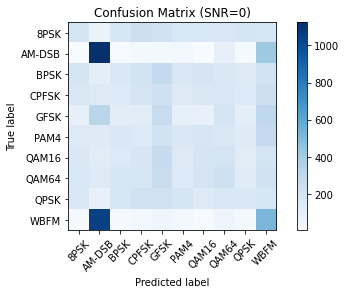


SNR =  2
Accuracy =  0.18648663604670465
Train Accuracy =  0.18563430493836458
Validation Accuracy =  0.16920877025738798
Avarege Overall Accuracy =  0.18044323708081908


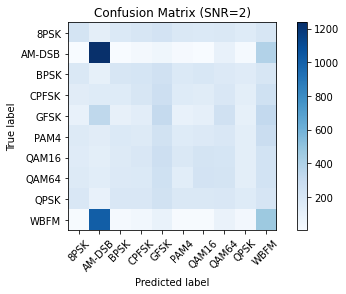


SNR =  4
Accuracy =  0.17366993301223496
Train Accuracy =  0.18575268141970813
Validation Accuracy =  0.19332079021636878
Avarege Overall Accuracy =  0.1842478015494373


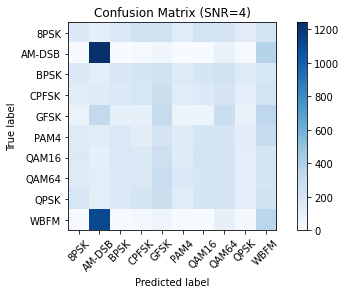


SNR =  6
Accuracy =  0.17863059083379348
Train Accuracy =  0.1835571733400276
Validation Accuracy =  0.1829683698296837
Avarege Overall Accuracy =  0.1817187113345016


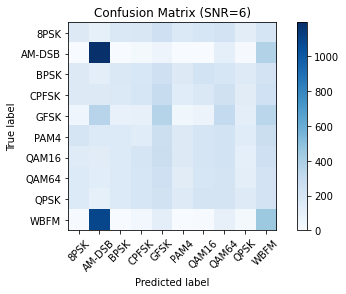


SNR =  8
Accuracy =  0.18360874645301284
Train Accuracy =  0.18682337610264635
Validation Accuracy =  0.18464437117286858
Avarege Overall Accuracy =  0.18502549790950926


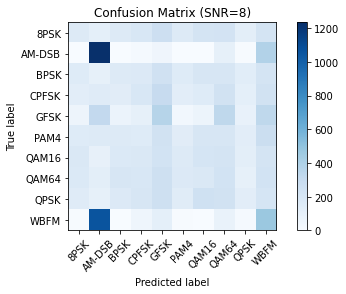


SNR =  10
Accuracy =  0.1774913514116728
Train Accuracy =  0.18736236236236237
Validation Accuracy =  0.18649669499527857
Avarege Overall Accuracy =  0.18378346958977124


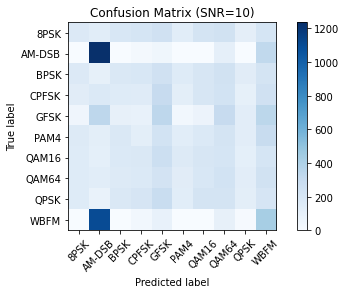


SNR =  12
Accuracy =  0.18003127094036184
Train Accuracy =  0.18508868624110633
Validation Accuracy =  0.18520220588235295
Avarege Overall Accuracy =  0.1834407210212737


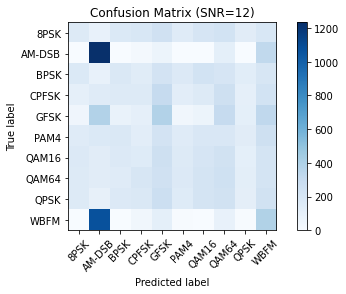


SNR =  14
Accuracy =  0.18699501936912008
Train Accuracy =  0.18809643395278755
Validation Accuracy =  0.18104265402843603
Avarege Overall Accuracy =  0.1853780357834479


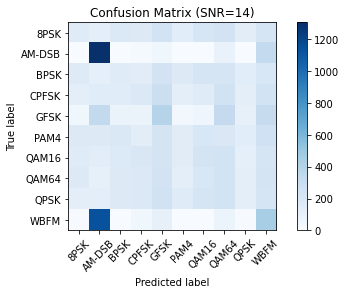


SNR =  16
Accuracy =  0.17831460674157304
Train Accuracy =  0.18384331705372273
Validation Accuracy =  0.18762088974854932
Avarege Overall Accuracy =  0.183259604514615


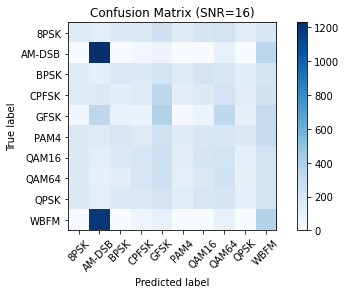


SNR =  18
Accuracy =  0.1827796234772979
Train Accuracy =  0.1824365023592009
Validation Accuracy =  0.18129770992366412
Avarege Overall Accuracy =  0.18217127858672097


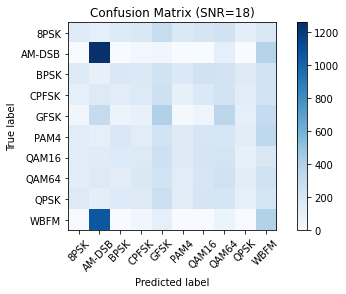

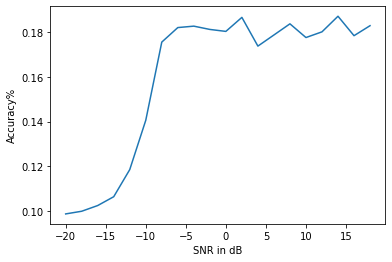

In [ ]:
acc = log_reg_classifier(snrs, mods, X_train, X_test, X_val, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr)
snr_plot(acc, snrs)


SNR =  -20
Accuracy =  0.09988327497081874
Train Accuracy =  1.0
Validation Accuracy =  0.098681218735789
Avarege Overall Accuracy =  0.3995214979022026


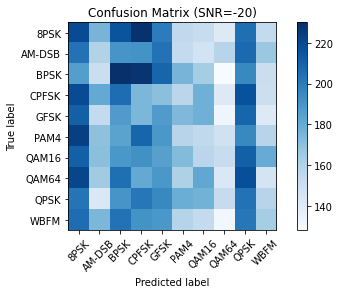


SNR =  -18
Accuracy =  0.10034773969200199
Train Accuracy =  1.0
Validation Accuracy =  0.10097087378640776
Avarege Overall Accuracy =  0.40043953782613656


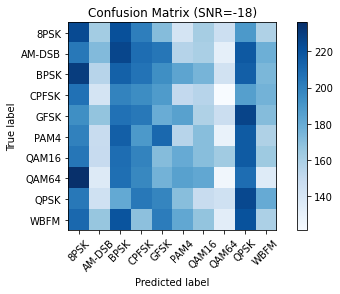


SNR =  -16
Accuracy =  0.10418880375817907
Train Accuracy =  1.0
Validation Accuracy =  0.11649580615097857
Avarege Overall Accuracy =  0.40689486996971924


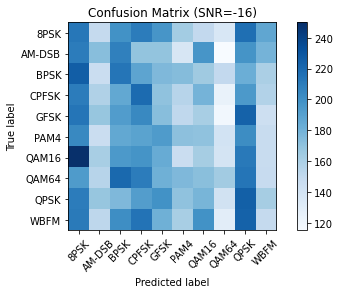


SNR =  -14
Accuracy =  0.10484273589615577
Train Accuracy =  1.0
Validation Accuracy =  0.09216362740266142
Avarege Overall Accuracy =  0.3990021210996057


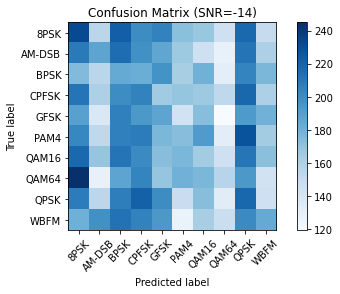


SNR =  -12
Accuracy =  0.10336578581363004
Train Accuracy =  1.0
Validation Accuracy =  0.09832935560859188
Avarege Overall Accuracy =  0.40056504714074065


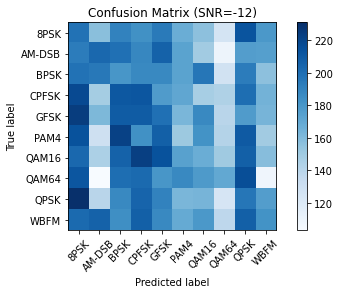


SNR =  -10
Accuracy =  0.10948261612210039
Train Accuracy =  1.0
Validation Accuracy =  0.11845210004719207
Avarege Overall Accuracy =  0.4093115720564308


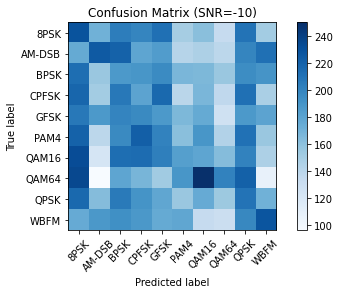


SNR =  -8
Accuracy =  0.12161028795079676
Train Accuracy =  1.0
Validation Accuracy =  0.12518054886856042
Avarege Overall Accuracy =  0.4155969456064524


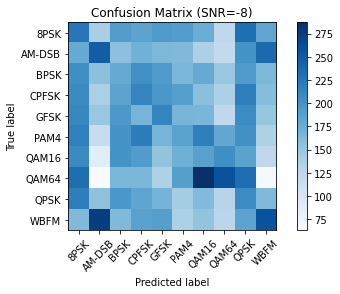


SNR =  -6
Accuracy =  0.14159389852989943
Train Accuracy =  1.0
Validation Accuracy =  0.13983661701105238
Avarege Overall Accuracy =  0.42714350518031724


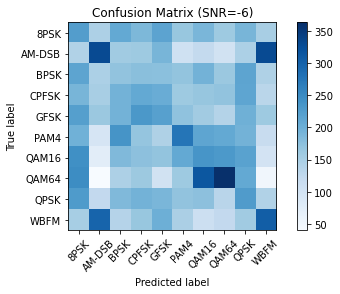


SNR =  -4
Accuracy =  0.17129939718687207
Train Accuracy =  1.0
Validation Accuracy =  0.18054211035818005
Avarege Overall Accuracy =  0.45061383584835074


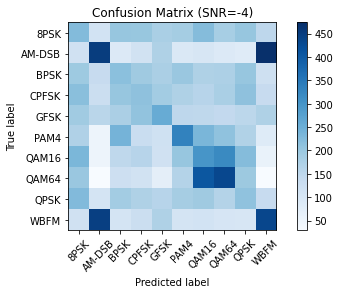


SNR =  -2
Accuracy =  0.2135540667737113
Train Accuracy =  1.0
Validation Accuracy =  0.20628019323671498
Avarege Overall Accuracy =  0.4732780866701421


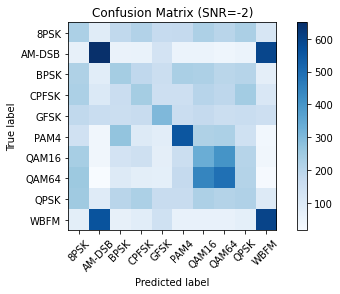


SNR =  0
Accuracy =  0.2625648463211915
Train Accuracy =  1.0
Validation Accuracy =  0.27586206896551724
Avarege Overall Accuracy =  0.5128089717622363


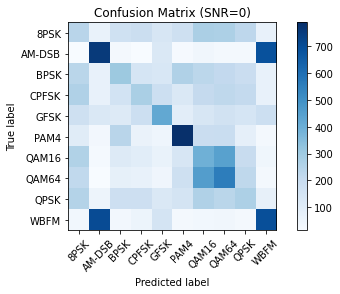


SNR =  2
Accuracy =  0.32588124619556197
Train Accuracy =  1.0
Validation Accuracy =  0.29551954242135364
Avarege Overall Accuracy =  0.5404669295389719


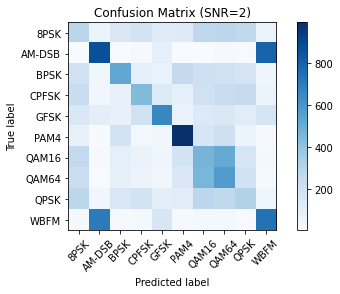


SNR =  4
Accuracy =  0.39677794386314563
Train Accuracy =  1.0
Validation Accuracy =  0.4002822201317027
Avarege Overall Accuracy =  0.5990200546649495


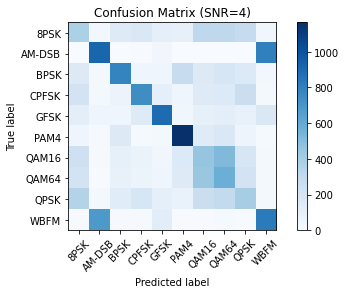


SNR =  6
Accuracy =  0.46339039204859195
Train Accuracy =  1.0
Validation Accuracy =  0.4408759124087591
Avarege Overall Accuracy =  0.634755434819117


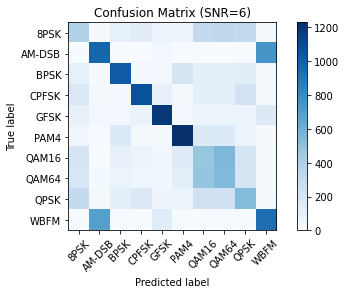


SNR =  8
Accuracy =  0.5030879652812552
Train Accuracy =  1.0
Validation Accuracy =  0.504003768252473
Avarege Overall Accuracy =  0.669030577844576


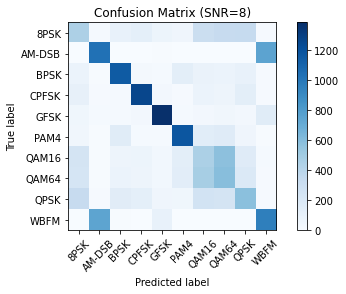


SNR =  10
Accuracy =  0.5444704832049995
Train Accuracy =  1.0
Validation Accuracy =  0.5594900849858357
Avarege Overall Accuracy =  0.7013201893969451


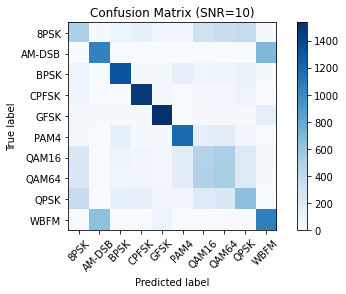


SNR =  12
Accuracy =  0.5625977216886308
Train Accuracy =  1.0
Validation Accuracy =  0.5611213235294118
Avarege Overall Accuracy =  0.7079063484060142


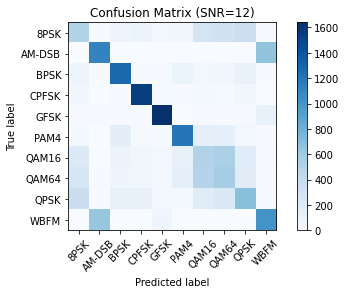


SNR =  14
Accuracy =  0.5648588821250692
Train Accuracy =  1.0
Validation Accuracy =  0.5848341232227489
Avarege Overall Accuracy =  0.7165643351159393


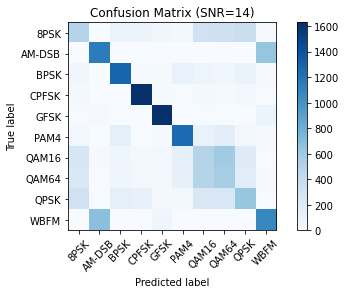


SNR =  16
Accuracy =  0.574438202247191
Train Accuracy =  1.0
Validation Accuracy =  0.559477756286267
Avarege Overall Accuracy =  0.7113053195111526


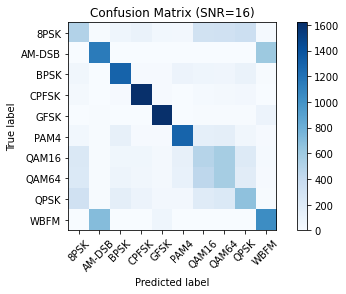


SNR =  18
Accuracy =  0.576578073089701
Train Accuracy =  1.0
Validation Accuracy =  0.5763358778625954
Avarege Overall Accuracy =  0.7176379836507655


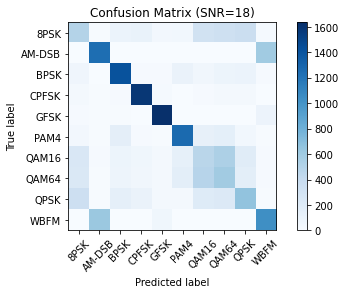

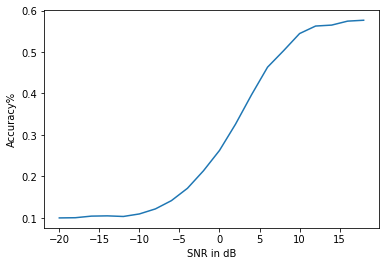

In [ ]:
del(acc)
gc.collect()
acc = decision_tree_classifier(snrs, mods, X_train, X_test, X_val, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr)
snr_plot(acc, snrs)
del(acc)
gc.collect()


SNR =  -20
Accuracy =  0.10082819187371464
Train Accuracy =  1.0
Validation Accuracy =  0.08958617553433379
Avarege Overall Accuracy =  0.3968047891360162


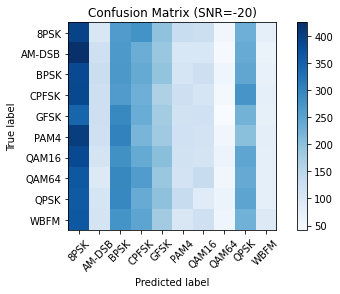


SNR =  -18
Accuracy =  0.10172765910470828
Train Accuracy =  1.0
Validation Accuracy =  0.11262135922330097
Avarege Overall Accuracy =  0.40478300610933643


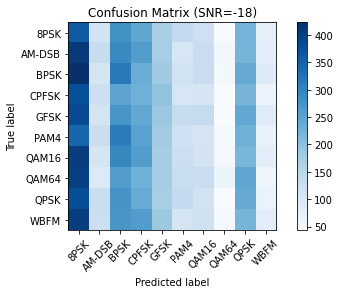


SNR =  -16
Accuracy =  0.10720876908450311
Train Accuracy =  1.0
Validation Accuracy =  0.09645852749301025
Avarege Overall Accuracy =  0.4012224321925045


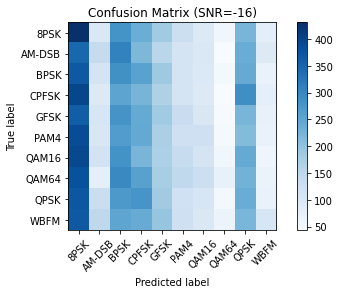


SNR =  -14
Accuracy =  0.10584123814278582
Train Accuracy =  1.0
Validation Accuracy =  0.09758501724987678
Avarege Overall Accuracy =  0.4011420851308875


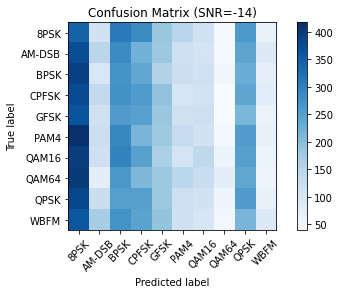


SNR =  -12
Accuracy =  0.11054242002781642
Train Accuracy =  1.0
Validation Accuracy =  0.1198090692124105
Avarege Overall Accuracy =  0.4101171630800757


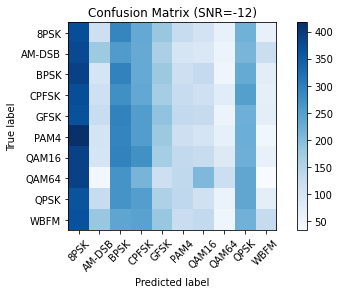


SNR =  -10
Accuracy =  0.13323048101823792
Train Accuracy =  1.0
Validation Accuracy =  0.13496932515337423
Avarege Overall Accuracy =  0.42273326872387074


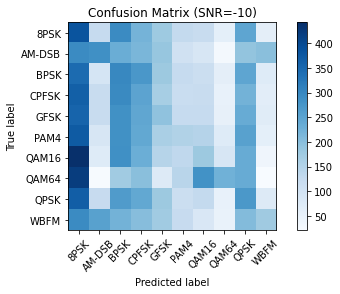


SNR =  -8
Accuracy =  0.16002236511042772
Train Accuracy =  1.0
Validation Accuracy =  0.16032739528165624
Avarege Overall Accuracy =  0.4401165867973613


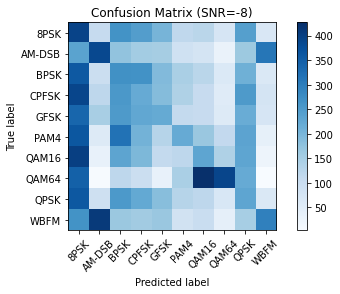


SNR =  -6
Accuracy =  0.219133414391511
Train Accuracy =  1.0
Validation Accuracy =  0.22873618452666988
Avarege Overall Accuracy =  0.48262319963939365


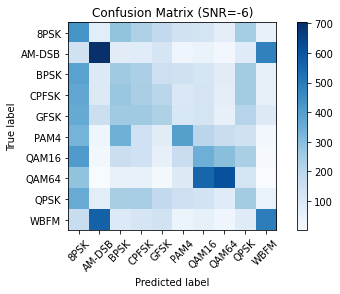


SNR =  -4
Accuracy =  0.2839919624916276
Train Accuracy =  1.0
Validation Accuracy =  0.29138431752178123
Avarege Overall Accuracy =  0.5251254266711363


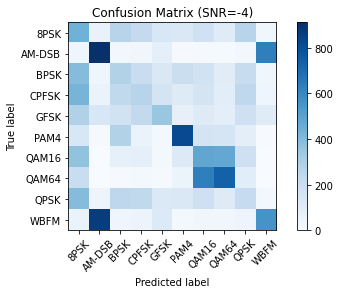


SNR =  -2
Accuracy =  0.3472675931565251
Train Accuracy =  1.0
Validation Accuracy =  0.34009661835748795
Avarege Overall Accuracy =  0.5624547371713376


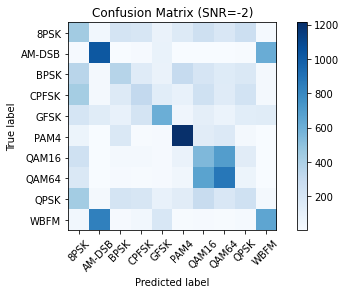


SNR =  0
Accuracy =  0.4253918670162325
Train Accuracy =  1.0
Validation Accuracy =  0.4027777777777778
Avarege Overall Accuracy =  0.6093898815980033


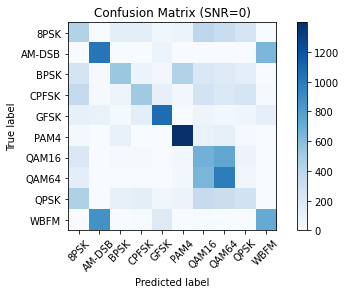


SNR =  2
Accuracy =  0.5239887111947319
Train Accuracy =  1.0
Validation Accuracy =  0.5190657769304099
Avarege Overall Accuracy =  0.6810181627083806


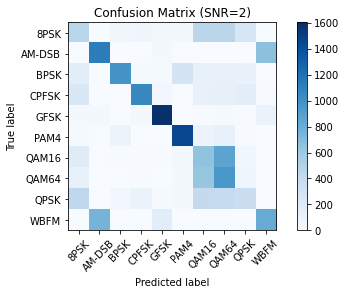


SNR =  4
Accuracy =  0.6024469910867519
Train Accuracy =  1.0
Validation Accuracy =  0.616650987770461
Avarege Overall Accuracy =  0.7396993262857375


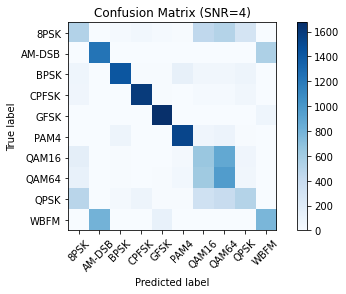


SNR =  6
Accuracy =  0.664715626725566
Train Accuracy =  1.0
Validation Accuracy =  0.6525547445255474
Avarege Overall Accuracy =  0.7724234570837044


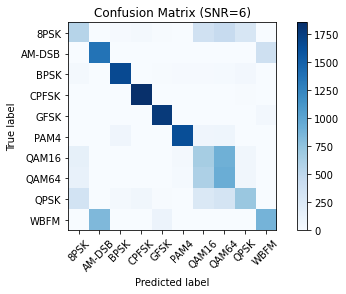


SNR =  8
Accuracy =  0.6717854559617203
Train Accuracy =  1.0
Validation Accuracy =  0.6773433820065945
Avarege Overall Accuracy =  0.7830429459894382


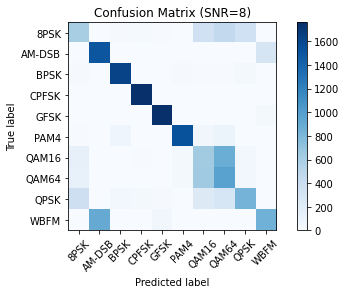


SNR =  10
Accuracy =  0.6855261689543578
Train Accuracy =  1.0
Validation Accuracy =  0.6959395656279509
Avarege Overall Accuracy =  0.7938219115274362


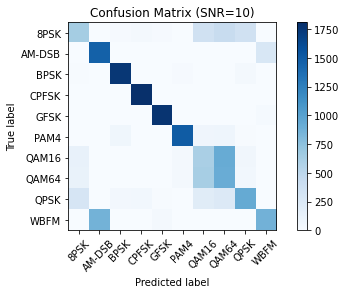


SNR =  12
Accuracy =  0.6926513290149654
Train Accuracy =  1.0
Validation Accuracy =  0.6773897058823529
Avarege Overall Accuracy =  0.7900136782991062


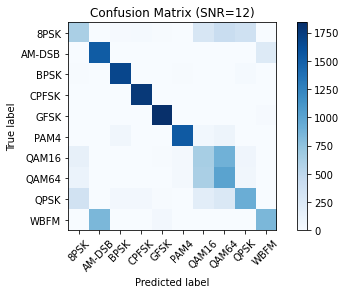


SNR =  14
Accuracy =  0.6933591588267847
Train Accuracy =  1.0
Validation Accuracy =  0.6990521327014217
Avarege Overall Accuracy =  0.7974704305094021


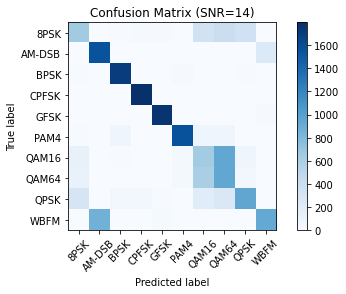


SNR =  16
Accuracy =  0.691067415730337
Train Accuracy =  1.0
Validation Accuracy =  0.6943907156673114
Avarege Overall Accuracy =  0.7951527104658829


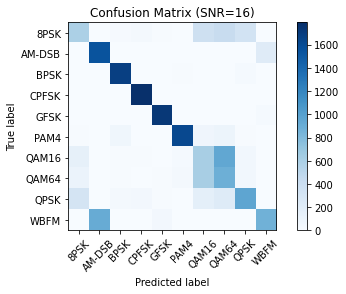


SNR =  18
Accuracy =  0.7037098560354375
Train Accuracy =  0.9999749021182612
Validation Accuracy =  0.6965648854961832
Avarege Overall Accuracy =  0.8000832145499607


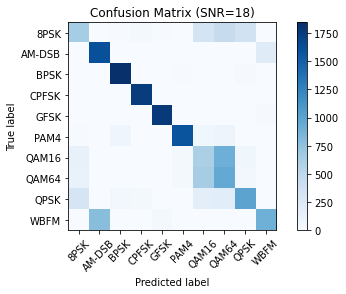

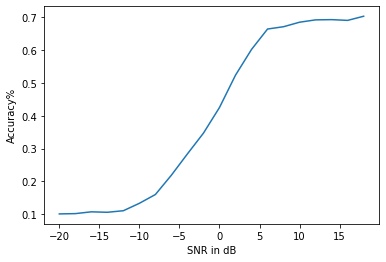

In [ ]:
acc = random_forest_classifier(snrs, mods, X_train, X_test, X_val, trainY_mods, testY_mods, valY_mods, trainY_snr, testY_snr, valY_snr)
snr_plot(acc, snrs)
del(acc)
gc.collect()

Model summary for this input: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4, 128)            16512     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 21,642
Trainable params: 21,642
Non-trainable params: 0
_________________________________________________________________
Start training for model: 
Epoch 1/100
780/780 - 6s - loss: 2.0169 - accuracy: 0.2379 - val_loss: 1.8439 - val_accuracy: 0.2872
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Modulation_classification/data/assets
Epoch 2/100
780/780 - 3s - loss: 1.7860 - accuracy: 0.3045 - val_loss: 1.7550 - val_accuracy: 0.3140
INFO:tensorflow:Assets wri

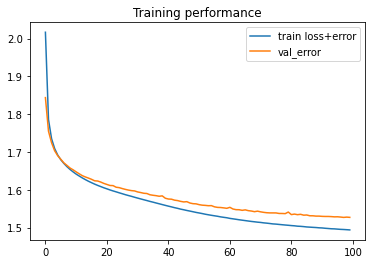

<Figure size 432x288 with 0 Axes>

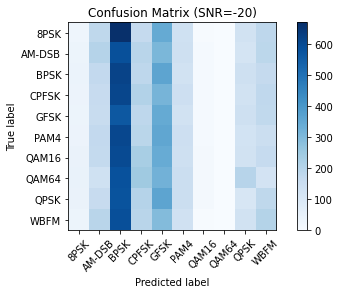


SNR =  -18
Accuracy =  0.10945520781586356
Train Accuracy =  0.12266780503729001
Validation Accuracy =  0.09223300970873786
Avarege Overall Accuracy =  0.10811867418729715


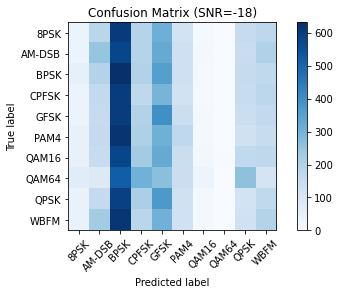


SNR =  -16
Accuracy =  0.11531793523852134
Train Accuracy =  0.12881194806494384
Validation Accuracy =  0.10764212488350419
Avarege Overall Accuracy =  0.11725733606232312


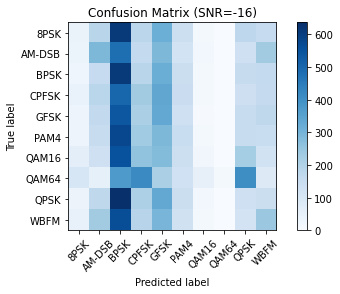


SNR =  -14
Accuracy =  0.12403616797026683
Train Accuracy =  0.1485830162227118
Validation Accuracy =  0.13602759980285856
Avarege Overall Accuracy =  0.13621559466527908


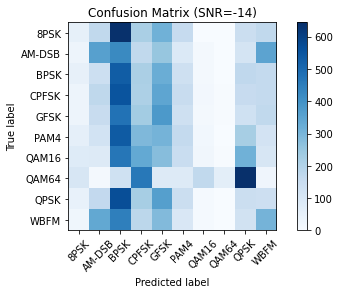


SNR =  -12
Accuracy =  0.1690681502086231
Train Accuracy =  0.19316303531179566
Validation Accuracy =  0.15799522673031027
Avarege Overall Accuracy =  0.1734088040835763


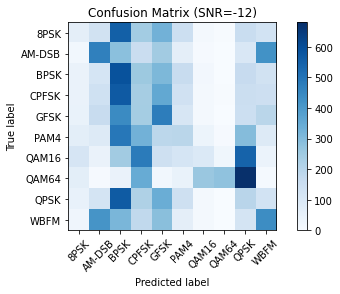


SNR =  -10
Accuracy =  0.24453137913934653
Train Accuracy =  0.2679704016913319
Validation Accuracy =  0.24587069372345446
Avarege Overall Accuracy =  0.25279082485137766


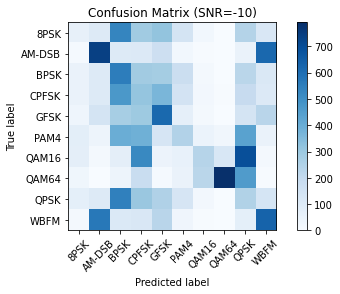


SNR =  -8
Accuracy =  0.32513279284316465
Train Accuracy =  0.3567111244317898
Validation Accuracy =  0.33654309099662977
Avarege Overall Accuracy =  0.33946233609052806


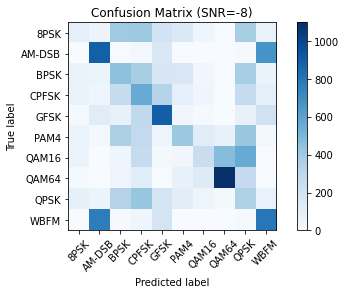


SNR =  -6
Accuracy =  0.40554880070741683
Train Accuracy =  0.4276208411801632
Validation Accuracy =  0.41182123978856316
Avarege Overall Accuracy =  0.41499696055871443


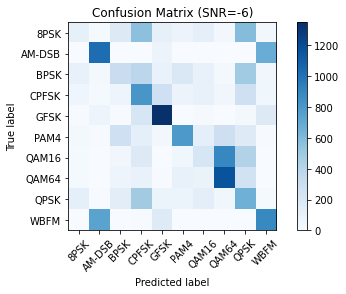


SNR =  -4
Accuracy =  0.45646349631614197
Train Accuracy =  0.4779349292818232
Validation Accuracy =  0.45982575024201355
Avarege Overall Accuracy =  0.4647413919466596


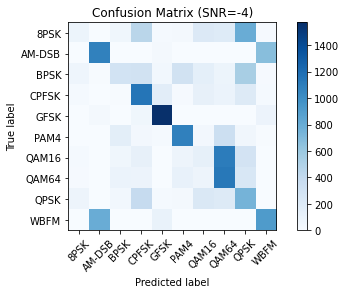


SNR =  -2
Accuracy =  0.47328497868335084
Train Accuracy =  0.48965361559106074
Validation Accuracy =  0.47439613526570046
Avarege Overall Accuracy =  0.47911157651337066


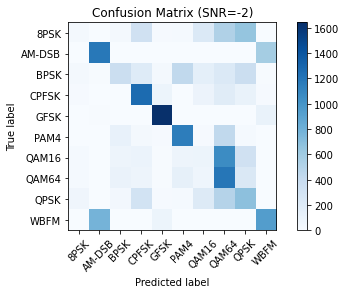


SNR =  0
Accuracy =  0.5109053383165059
Train Accuracy =  0.5235713392522195
Validation Accuracy =  0.5076628352490421
Avarege Overall Accuracy =  0.5140465042725891


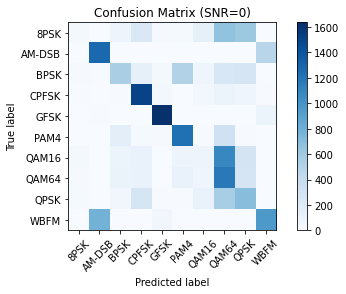


SNR =  2
Accuracy =  0.5383210669027724
Train Accuracy =  0.5503000175742512
Validation Accuracy =  0.5352716873212583
Avarege Overall Accuracy =  0.5412975905994273


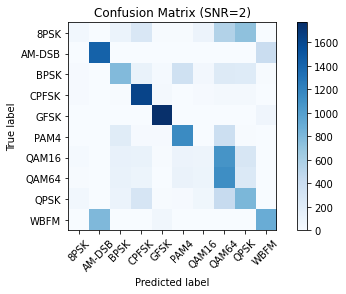


SNR =  4
Accuracy =  0.560095222277584
Train Accuracy =  0.5650950742257165
Validation Accuracy =  0.5663217309501412
Avarege Overall Accuracy =  0.5638373424844806


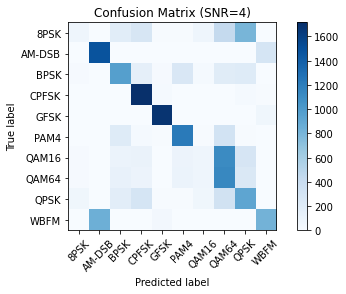


SNR =  6
Accuracy =  0.5757040309221425
Train Accuracy =  0.5743441697000126
Validation Accuracy =  0.5781021897810219
Avarege Overall Accuracy =  0.5760501301343924


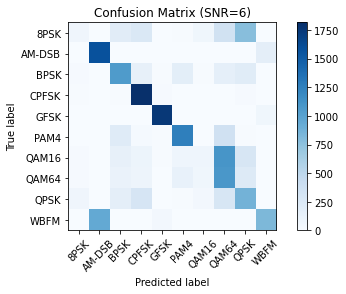


SNR =  8
Accuracy =  0.5702998942858732
Train Accuracy =  0.5785635525260625
Validation Accuracy =  0.5581723975506359
Avarege Overall Accuracy =  0.5690119481208572


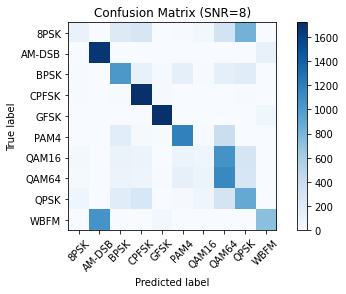


SNR =  10
Accuracy =  0.5738756835174645
Train Accuracy =  0.5824574574574575
Validation Accuracy =  0.5835694050991501
Avarege Overall Accuracy =  0.579967515358024


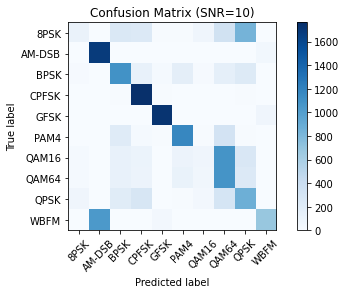


SNR =  12
Accuracy =  0.583370560643288
Train Accuracy =  0.5832748772422086
Validation Accuracy =  0.5850183823529411
Avarege Overall Accuracy =  0.5838879400794792


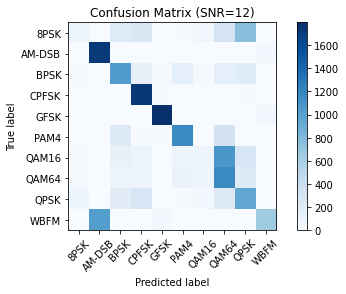


SNR =  14
Accuracy =  0.5757609297177643
Train Accuracy =  0.5844048216976394
Validation Accuracy =  0.5786729857819906
Avarege Overall Accuracy =  0.5796129123991314


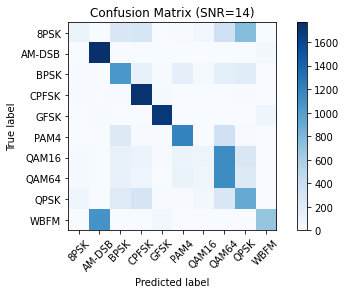


SNR =  16
Accuracy =  0.5731460674157304
Train Accuracy =  0.5835742051230938
Validation Accuracy =  0.5851063829787234
Avarege Overall Accuracy =  0.5806088851725159


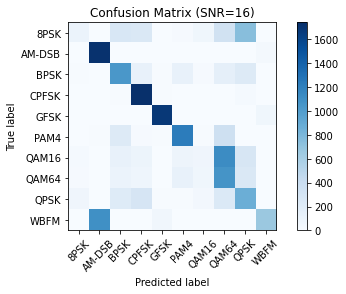


SNR =  18
Accuracy =  0.5849390919158362
Train Accuracy =  0.5856088746109829
Validation Accuracy =  0.5749045801526718
Avarege Overall Accuracy =  0.5818175155598303


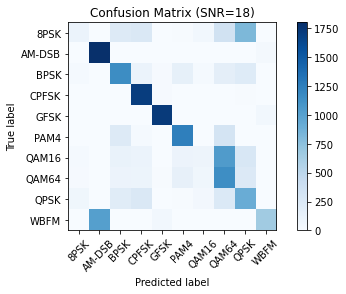

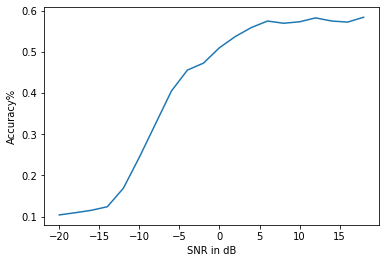

In [ ]:
full_dense(trainX, trainY_mod10, valX, valY_mod10, testX)
gc.collect()

Model summary for this input: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1, 4, 128)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 4, 126)        256       
_________________________________________________________________
dropout (Dropout)            (None, 64, 4, 126)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 3, 124)        6160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 3, 124)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5952)              0         
_________________________________________________________________
dense1 (Dense)         

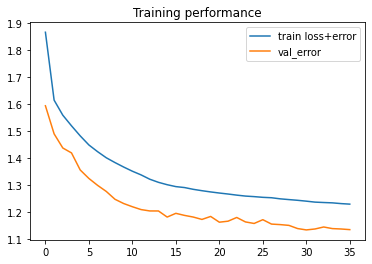

<Figure size 432x288 with 0 Axes>

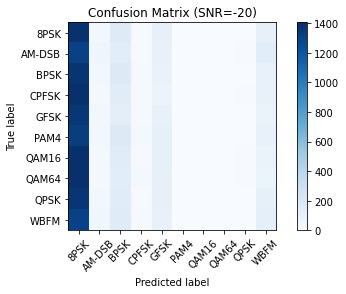


SNR =  -18
Accuracy =  0.09963018159739472
Train Accuracy =  0.11124224694272154
Validation Accuracy =  0.13155339805825242
Avarege Overall Accuracy =  0.11414194219945623


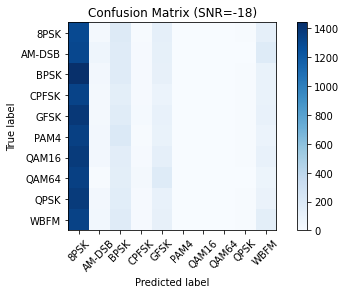


SNR =  -16
Accuracy =  0.11106761366813936
Train Accuracy =  0.11797963625447176
Validation Accuracy =  0.10298229263746506
Avarege Overall Accuracy =  0.11067651418669207


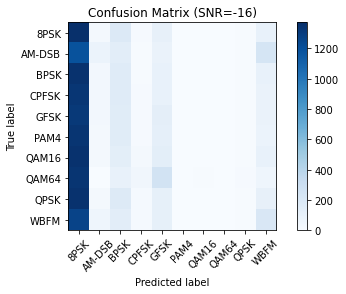


SNR =  -14
Accuracy =  0.12281577633549676
Train Accuracy =  0.12802924093731224
Validation Accuracy =  0.12962050271069492
Avarege Overall Accuracy =  0.12682183999450133


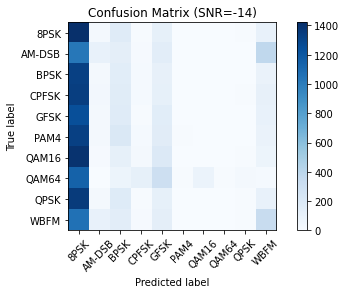


SNR =  -12
Accuracy =  0.15187760778859527
Train Accuracy =  0.1629601803155522
Validation Accuracy =  0.14558472553699284
Avarege Overall Accuracy =  0.15347417121371343


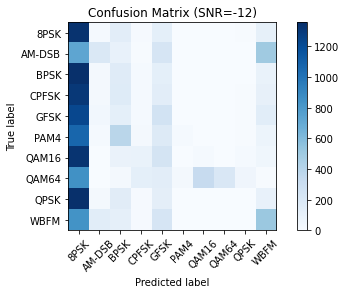


SNR =  -10
Accuracy =  0.24574356713868534
Train Accuracy =  0.2596395852209806
Validation Accuracy =  0.24681453515809343
Avarege Overall Accuracy =  0.2507325625059198


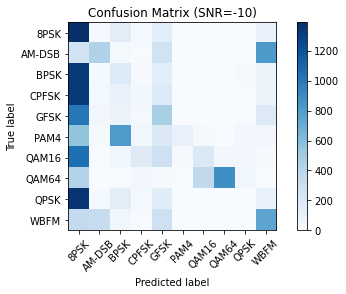


SNR =  -8
Accuracy =  0.3720995247414034
Train Accuracy =  0.38943004146061244
Validation Accuracy =  0.3765045739046702
Avarege Overall Accuracy =  0.37934471336889536


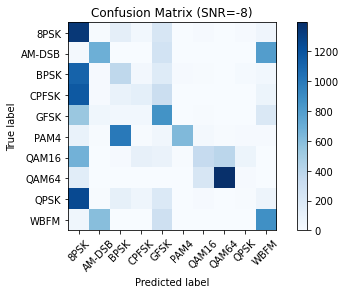


SNR =  -6
Accuracy =  0.5060240963855421
Train Accuracy =  0.5273320778405525
Validation Accuracy =  0.49735703988467084
Avarege Overall Accuracy =  0.5102377380369219


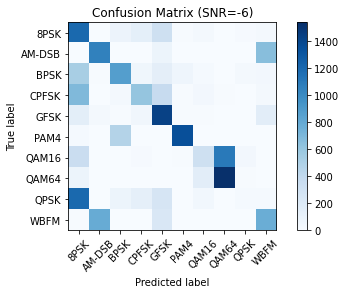


SNR =  -4
Accuracy =  0.6202277294038848
Train Accuracy =  0.6354890299365286
Validation Accuracy =  0.6239109390125847
Avarege Overall Accuracy =  0.6265425661176659


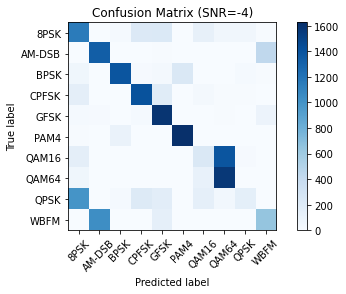


SNR =  -2
Accuracy =  0.6920989978406511
Train Accuracy =  0.6939978429356142
Validation Accuracy =  0.6903381642512078
Avarege Overall Accuracy =  0.6921450016758244


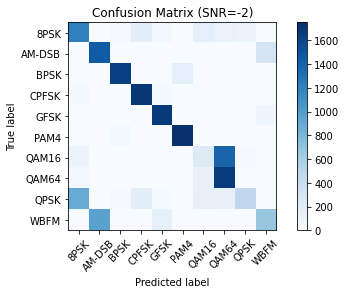


SNR =  0
Accuracy =  0.7317454119484577
Train Accuracy =  0.7352507190196323
Validation Accuracy =  0.7380268199233716
Avarege Overall Accuracy =  0.7350076502971539


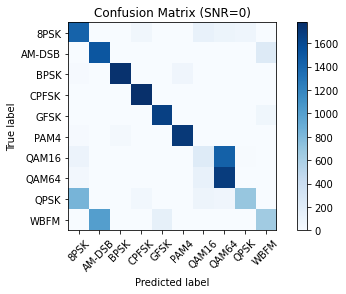


SNR =  2
Accuracy =  0.7545238226993526
Train Accuracy =  0.7534332555045066
Validation Accuracy =  0.7526215443279314
Avarege Overall Accuracy =  0.7535262075105967


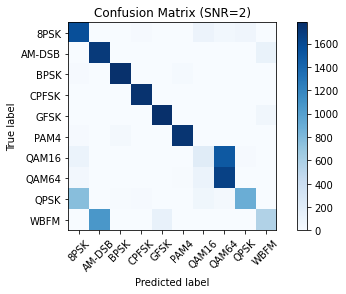


SNR =  4
Accuracy =  0.7612246027791618
Train Accuracy =  0.7596141769862601
Validation Accuracy =  0.7549388523047977
Avarege Overall Accuracy =  0.7585925440234066


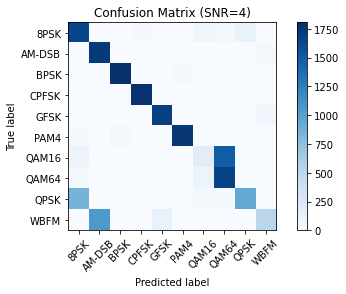


SNR =  6
Accuracy =  0.7662617338487023
Train Accuracy =  0.7631479854399398
Validation Accuracy =  0.7576642335766424
Avarege Overall Accuracy =  0.7623579842884282


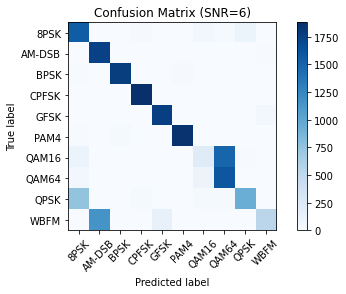


SNR =  8
Accuracy =  0.7596394591887832
Train Accuracy =  0.7645850040096231
Validation Accuracy =  0.7668393782383419
Avarege Overall Accuracy =  0.7636879471455827


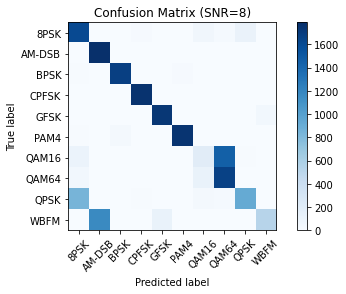


SNR =  10
Accuracy =  0.7648699921883718
Train Accuracy =  0.7635385385385386
Validation Accuracy =  0.7653446647780925
Avarege Overall Accuracy =  0.7645843985016677


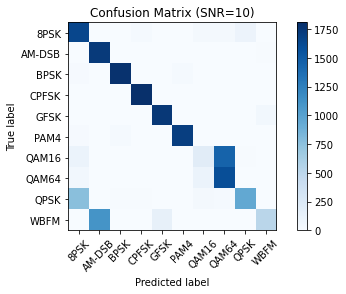


SNR =  12
Accuracy =  0.762005807460353
Train Accuracy =  0.7604469385709991
Validation Accuracy =  0.7582720588235294
Avarege Overall Accuracy =  0.7602416016182939


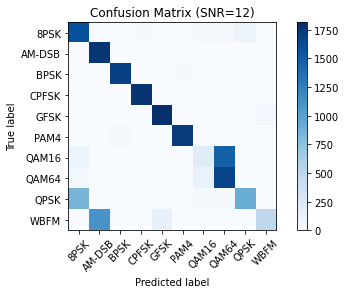


SNR =  14
Accuracy =  0.7546762589928058
Train Accuracy =  0.7683324962330487
Validation Accuracy =  0.7644549763033175
Avarege Overall Accuracy =  0.7624879105097241


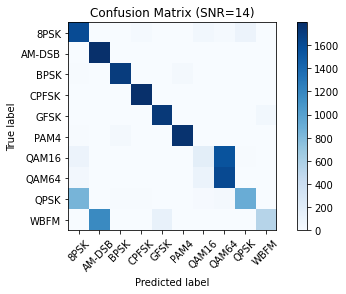


SNR =  16
Accuracy =  0.7569662921348315
Train Accuracy =  0.7630070766470647
Validation Accuracy =  0.7519342359767892
Avarege Overall Accuracy =  0.7573025349195618


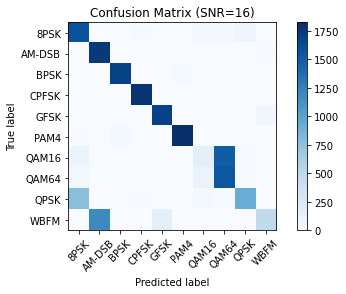


SNR =  18
Accuracy =  0.7698781838316722
Train Accuracy =  0.7616454171267945
Validation Accuracy =  0.7614503816793893
Avarege Overall Accuracy =  0.7643246608792853


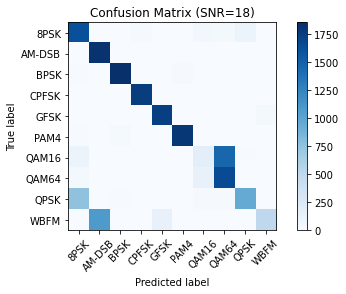

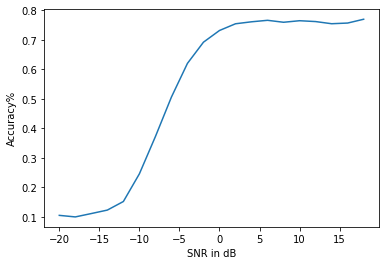

In [ ]:
CnnModel(trainX,trainY_mod10,valX,valY_mod10,testX,testY_mod10)